<a href="https://colab.research.google.com/github/AlaricAI/DataSayns-and-AI/blob/main/11.Deep%20Learning/4_Semantic_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import fastai

print(torch.__version__)
print(fastai.__version__)

2.6.0+cu124
2.7.19


In [ ]:
from fastai.vision.all import *
import numpy as np

path = untar_data(URLs.CAMVID_TINY)

def lebel_getter(file):
    return path/'labels'/f'{file.stem}_P{file.suffix}'

dls = SegmentationDataLoaders.from_label_func(path,bs=8,fnames=get_image_files(path/'images'),
    label_func=lebel_getter,codes=np.loadtxt(path/'codes.txt',  dtype=str))

learn = unet_learner(dls,resnet34)
learn.fine_tune(12)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 135MB/s]


epoch,train_loss,valid_loss,time
0,3.701442,2.358266,00:02


epoch,train_loss,valid_loss,time
0,1.821025,1.487710,00:01
1,1.579646,1.208337,00:01
2,1.464022,1.147718,00:01
3,1.334651,1.015051,00:01
4,1.207788,0.856823,00:01
5,1.092846,0.810952,00:01
6,0.994651,0.730080,00:01
7,0.909605,0.724252,00:01
8,0.835900,0.710697,00:01
9,0.773334,0.703019,00:01


In [ ]:
!ls/root/.fastai/data/camvid_tiny/labels

/bin/bash: line 1: ls/root/.fastai/data/camvid_tiny/labels: No such file or directory


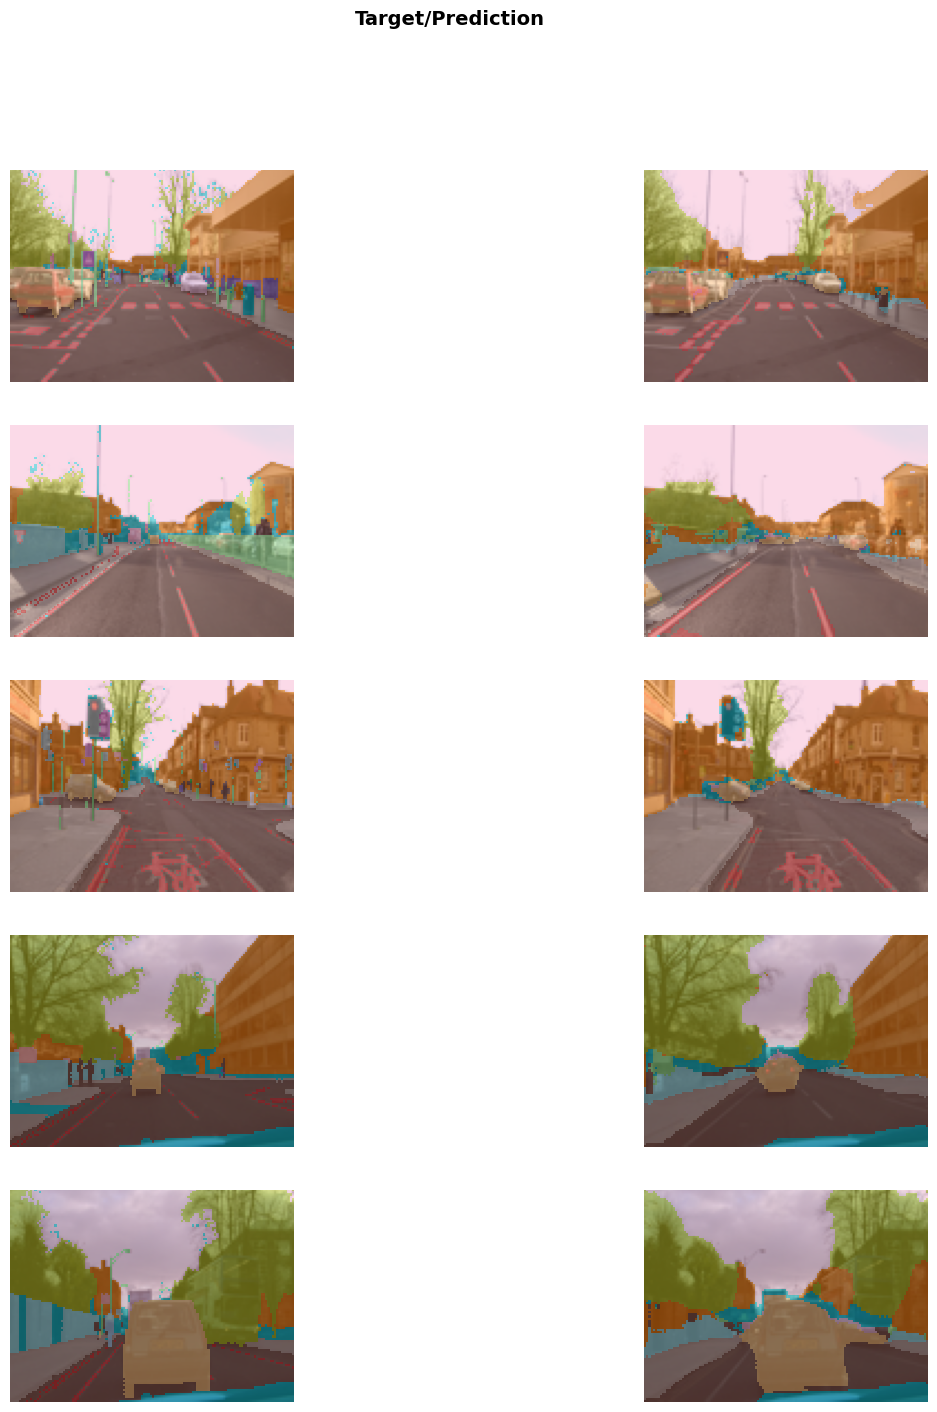

In [ ]:
learn.show_results(max_n=5, figsize=(15,16))